In [106]:
import pandas as pd, numpy as np, matplotlib, matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW
import seaborn as sns
import math

In [2]:
df = pd.read_csv('CIS-72M0003-E-2017_F1.csv')

In [3]:
df.head()

,YEAR,PUMFID,PERSONID,FWEIGHT,PROV,USZGAP,MBMREGP,AGEGP,SEX,MARST,...,DWLTYP,DWTENR,REPA,SUIT,MORTG,MORTGM,CONDMP,RENTM,CHNEED,VERDATE
0,2017,2129,212901,752.8642,24,8,18,4,2,6,...,1,1,3,1,2,99999996,99999996,99999996,2,02JUL2019
1,2017,2129,212902,752.8642,24,8,18,4,1,6,...,1,1,3,1,2,99999996,99999996,99999996,2,02JUL2019
2,2017,2129,212903,752.8642,24,8,18,10,2,2,...,1,1,3,1,2,99999996,99999996,99999996,2,02JUL2019
3,2017,2129,212904,752.8642,24,8,18,10,1,2,...,1,1,3,1,2,99999996,99999996,99999996,2,02JUL2019
4,2017,2130,213001,138.0238,12,5,7,16,1,1,...,1,1,2,1,2,99999996,99999996,99999996,6,02JUL2019


In [4]:
# Remove invalid rows

In [5]:
df = df[df['MTINC'] < 99999996]

In [6]:
df = df[df['WGSAL'] < 99999996]

In [7]:
df = df[df['SEMP'] < 99999996]

In [8]:
df[['SEMP', 'MTINC', 'WGSAL']].describe().round(2)

,SEMP,MTINC,WGSAL
count,75372.00,75372.00,75372.00
mean,1665.73,40720.76,31230.96
std,11830.14,49814.94,45891.87
min,-62500.00,-62350.00,0.00
25%,0.00,6750.00,0.00
50%,0.00,29000.00,13500.00
75%,0.00,58075.00,50000.00
max,430000.00,1257400.00,975000.00


In [ ]:
# Calculate the weighted values

In [9]:
w_mtinc = DescrStatsW(df['MTINC'], weights=df['FWEIGHT']) 

In [10]:
w_mtinc.mean # Note that it is less than the unweighted mean

39589.62542666547

In [13]:
# Compute the fraction of business income that should be considered labour income

In [14]:
w_wgsal = DescrStatsW(df['WGSAL'], weights=df['FWEIGHT']) 

In [15]:
w_semp = DescrStatsW(df['SEMP'], weights=df['FWEIGHT']) 

In [16]:
bi_fraction = w_wgsal.sum / (w_mtinc.sum - w_semp.sum)

In [17]:
bi_fraction

0.805830435540061

In [18]:
# Create an earnings column

In [19]:
df['EARNINGS'] = df['WGSAL'] + ( bi_fraction * df['SEMP'] )

In [20]:
df['EARNINGS'].describe()

count     75372.000000
mean      32573.251836
std       46150.774779
min      -50364.402221
25%           0.000000
50%       16500.000000
75%       50000.000000
max      981849.558702
Name: EARNINGS, dtype: float64

In [29]:
w_earnings = DescrStatsW(df['EARNINGS'], weights=df['FWEIGHT']) 

In [30]:
w_earnings.mean

31902.52510043777

In [21]:
# Create subset for Quebec (PROV = 24)

In [22]:
quebec_df = df[df['PROV'] == 24]

In [23]:
len(quebec_df)

13620

In [24]:
quebec_df[['EARNINGS', 'MTINC', 'WGSAL']].describe().round(2)

,EARNINGS,MTINC,WGSAL
count,13620.00,13620.00,13620.00
mean,28480.07,35823.52,27304.48
std,37047.91,39594.27,36416.28
min,-24955.74,-28000.00,0.00
25%,0.00,6250.00,0.00
50%,15000.00,27000.00,12500.00
75%,46000.00,52500.00,45000.00
max,470000.00,625000.00,470000.00


In [38]:
w_quebec_earnings = DescrStatsW(quebec_df['EARNINGS'], weights=quebec_df['FWEIGHT'])
w_quebec_mtinc = DescrStatsW(quebec_df['MTINC'], weights=quebec_df['FWEIGHT'])
print(w_quebec_earnings.mean)
print(w_quebec_mtinc.mean)

27662.680258110042
34577.30652955231


In [33]:
# Create subset for ages 25-55 (age groups 7-12)

In [34]:
mid_df = df.loc[(pd.to_numeric(df['AGEGP']) > 6) & (pd.to_numeric(df['AGEGP']) < 13)]

In [35]:
mid_df[['EARNINGS', 'MTINC', 'WGSAL']].describe().round(2)

,EARNINGS,MTINC,WGSAL
count,34992.00,34992.00,34992.00
mean,48931.58,52460.53,47217.73
std,49208.69,52296.50,49472.60
min,-50364.40,-62350.00,0.00
25%,15000.00,18500.00,10500.00
50%,41000.00,43500.00,40000.00
75%,70000.00,73281.25,70000.00
max,975000.00,1257400.00,975000.00


In [37]:
w_mid_earnings = DescrStatsW(mid_df['EARNINGS'], weights=mid_df['FWEIGHT'])
w_mid_mtinc = DescrStatsW(mid_df['MTINC'], weights=mid_df['FWEIGHT'])
print(w_mid_earnings.mean)
print(w_mid_mtinc.mean)

46513.85282613269
49961.21050870748


In [40]:
# Show weighted earnings and income distribution by quantiles

In [41]:
quantiles = [0, .01, .05, .1, .2, .4, .6, .8, .9, .95, .99, 1]

In [42]:
w_earnings.quantile(quantiles)

p
0.00    -50364.402221
0.01         0.000000
0.05         0.000000
0.10         0.000000
0.20         0.000000
0.40      6000.000000
0.60     27000.000000
0.80     57500.000000
0.90     85000.000000
0.95    110000.000000
0.99    190000.000000
1.00    981849.558702
dtype: float64

In [44]:
quant_df = pd.DataFrame(w_earnings.quantile(quantiles)).transpose()

In [48]:
quant_df.append(w_mtinc.quantile(quantiles), ignore_index=True).rename(index={0: 'EARNINGS', 1: 'MTINC'}).round(2)

p,0.00,0.01,0.05,0.10,0.20,0.40,0.60,0.80,0.90,0.95,0.99,1.00
EARNINGS,-50364.4,0.0,0.0,0.0,0.0,6000.0,27000.0,57500.0,85000.0,110000.0,190000.0,981849.56
MTINC,-62350.0,0.0,0.0,0.0,2725.0,17000.0,37000.0,65000.0,92500.0,120000.0,222500.0,1257400.00


In [50]:
qc_quant_df = pd.DataFrame(w_quebec_earnings.quantile(quantiles)).transpose()

In [51]:
qc_quant_df.append(w_quebec_mtinc.quantile(quantiles), ignore_index=True).rename(index={0: 'EARNINGS', 1: 'MTINC'}).round(2)

p,0.00,0.01,0.05,0.10,0.20,0.40,0.60,0.80,0.90,0.95,0.99,1.00
EARNINGS,-24955.74,0.0,0.0,0.0,0.0,4400.0,25000.0,52500.0,75000.0,95000.0,155000.0,470000.0
MTINC,-28000.00,0.0,0.0,0.0,2100.0,16250.0,33500.0,57500.0,80000.0,101900.0,185000.0,625000.0


In [52]:
mid_quant_df = pd.DataFrame(w_mid_earnings.quantile(quantiles)).transpose()

In [54]:
mid_quant_df.append(w_mid_mtinc.quantile(quantiles), ignore_index=True).rename(index={0: 'EARNINGS', 1: 'MTINC'}).round(2)

p,0.00,0.01,0.05,0.10,0.20,0.40,0.60,0.80,0.90,0.95,0.99,1.00
EARNINGS,-50364.4,0.0,0.0,0.0,6000.0,27000.0,47000.0,75000.0,97500.0,125000.0,220000.0,975000.0
MTINC,-62350.0,0.0,0.0,0.0,9525.0,30000.0,50000.0,78425.0,102725.0,130300.0,231975.0,1257400.0


In [82]:
# Plot a histogram of income distribution

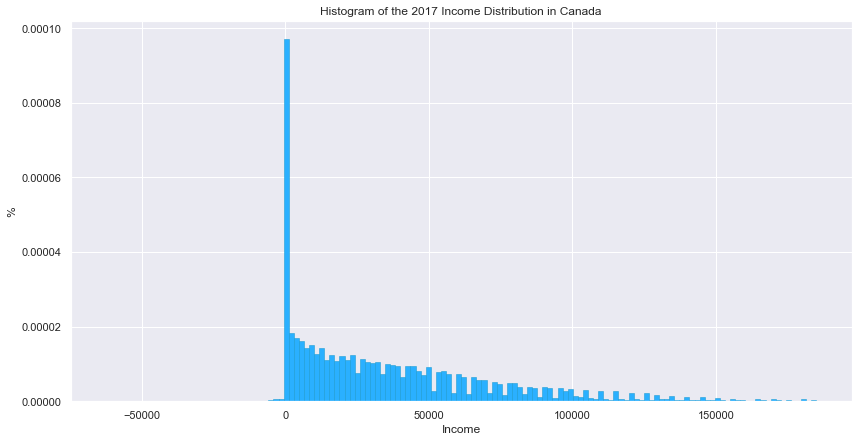

In [101]:
plt.figure(figsize=(14,7))

# Cut off the tail of distribution to visualize easier
tail = df[df['MTINC'] <= 185000]
w_tail = DescrStatsW(tail['MTINC'], weights=tail['FWEIGHT'])

plt.hist(w_tail.asrepeats(), density=True, bins=140, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Histogram of the 2017 Income Distribution in Canada') 
plt.xlabel('Income') 
plt.ylabel('%')
plt.savefig('income_hist.png')
plt.show()

In [58]:
# Let's plot with kernal density using Seaborn

In [74]:
sns.set(rc={'figure.figsize':(12,6)})

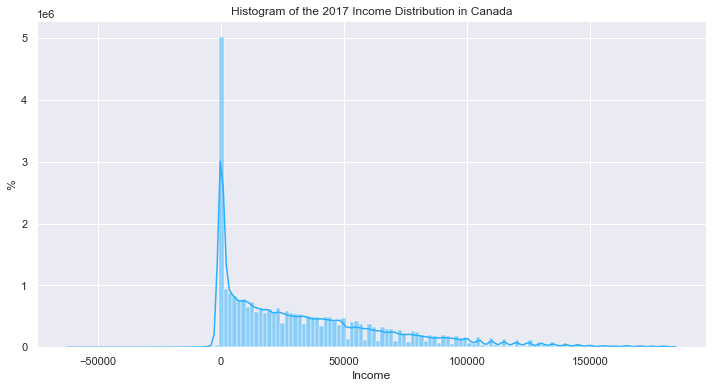

In [87]:
ax = sns.histplot(w_tail.asrepeats(), kde=True, bins=140, color = '#2ab0ff')
ax.set(xlabel='Income', ylabel='%', title='Histogram of the 2017 Income Distribution in Canada')
fig = ax.get_figure()
fig.savefig("kd_hist.png")

In [103]:
# Calculate the coefficient of variation for income and earnings

In [103]:
cv_income_all = w_mtinc.std / w_mtinc.mean
print(cv_income_all)

1.3051621810879537


In [104]:
cv_earnings_all = w_earnings.std / w_earnings.mean
print(cv_earnings_all)

1.4960226978808355


In [105]:
# Calculate the variance of the logs

In [109]:
# Find the log earnings and mtinc, make sure the values are non-negative
df['LOG_EARNINGS'] = df['EARNINGS'].apply(lambda x : math.log(x + 50365.4))

In [111]:
df['LOG_EARNINGS'].describe()

count    75372.000000
mean        11.223217
std          0.433054
min         -0.002224
25%         10.827060
50%         11.110437
75%         11.516573
max         13.847217
Name: LOG_EARNINGS, dtype: float64

In [112]:
w_log_earnings = DescrStatsW(df['LOG_EARNINGS'], weights=df['FWEIGHT'])

In [113]:
w_log_earnings.var

0.17932974970309615

In [114]:
df['LOG_MTINC'] = df['MTINC'].apply(lambda x : math.log(x + 62351))
w_log_mtinc = DescrStatsW(df['LOG_MTINC'], weights=df['FWEIGHT'])
print(w_log_mtinc.var)

0.13808974968966073


In [115]:
# Compute the Gini index for earnings and market income

In [116]:
def gini(x, w):
    x = np.asarray(x)
    w = np.asarray(w)
    sorted_indices = np.argsort(x)
    sorted_x = x[sorted_indices]
    sorted_w = w[sorted_indices]
    # Force float dtype to avoid overflows
    cumw = np.cumsum(sorted_w, dtype=float)
    cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
    return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / (cumxw[-1] * cumw[-1]))

In [117]:
gini(df['EARNINGS'], df['FWEIGHT'])

0.6514668888805589

In [119]:
gini(df['MTINC'], df['FWEIGHT'])

0.5726408723414022

In [120]:
# Compute the ratio of the top 1% over the lowest 40%

In [122]:
w_earnings.quantile([.99])

p
0.99    190000.000000
1.00    981849.558702
dtype: float64

In [124]:
top_1p_earnings = df[df['EARNINGS'] >= 190000]

In [125]:
len(top_1p_earnings)

714

In [126]:
w_top_1p_earnings = DescrStatsW(top_1p_earnings['EARNINGS'], weights=top_1p_earnings['FWEIGHT'])

In [127]:
w_earnings.quantile([.4])

p
0.4    6000.0
dtype: float64

In [129]:
bottom_40p_earnings = df[df['EARNINGS'] <= 6000]
w_bottom_40p_earnings = DescrStatsW(bottom_40p_earnings['EARNINGS'], weights=bottom_40p_earnings['FWEIGHT'])

In [130]:
w_top_1p_earnings.sum / w_bottom_40p_earnings.sum

15.118043951137905

In [131]:
# Now the same for market income

In [132]:
w_mtinc.quantile([.99])

p
0.99    222500
dtype: int64

In [133]:
top_1p_mtinc = df[df['MTINC'] >= 222500]
w_top_1p_mtinc = DescrStatsW(top_1p_mtinc['MTINC'], weights=top_1p_mtinc['FWEIGHT'])

In [135]:
w_mtinc.quantile([.4])

p
0.4    17000
dtype: int64

In [136]:
bottom_40p_mtinc = df[df['MTINC'] <= 17000]
w_bottom_40p_mtinc = DescrStatsW(bottom_40p_mtinc['MTINC'], weights=bottom_40p_mtinc['FWEIGHT'])

In [137]:
w_top_1p_mtinc.sum / w_bottom_40p_mtinc.sum

1.8087432339936367

In [160]:
# Compute the ratio of mean to median
def weighted_median(val):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted['FWEIGHT'].cumsum()
    cutoff = df_sorted['FWEIGHT'].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]

In [162]:
w_earnings.mean / weighted_median('EARNINGS')

2.058227425834695

In [163]:
w_mtinc.mean / weighted_median('MTINC')

1.522677901025595

In [173]:
w_earnings.quantile(quantiles)

p
0.00    -50364.402221
0.01         0.000000
0.05         0.000000
0.10         0.000000
0.20         0.000000
0.40      6000.000000
0.60     27000.000000
0.80     57500.000000
0.90     85000.000000
0.95    110000.000000
0.99    190000.000000
1.00    981849.558702
dtype: float64

In [ ]:
# Analyze the sources of income across the distribution

In [176]:
bin_labels = [0,.01,.4,.6,.8,.9,.95,1]
df['EARNINGS_BINNED'] = pd.cut(df['EARNINGS'], w_earnings.quantile(quantiles).unique(), labels=bin_labels)

In [177]:
df[['EARNINGS', 'EARNINGS_BINNED']]

,EARNINGS,EARNINGS_BINNED
0,11739.823481,0.4
1,10206.820003,0.4
2,0.000000,0.0
3,96699.652265,0.9
4,0.000000,0.0
...,...,...
92282,-2498.074350,0.0
92283,0.000000,0.0
92284,0.000000,0.0
92290,15310.778275,0.4


In [178]:
w_mtinc.quantile(quantiles)

p
0.00     -62350
0.01          0
0.05          0
0.10          0
0.20       2725
0.40      17000
0.60      37000
0.80      65000
0.90      92500
0.95     120000
0.99     222500
1.00    1257400
dtype: int64

In [198]:
bin_labels = ['1st Quintile','2nd Quintile','3rd Quintile','4th Quintile','5th Quintile']
df['MTINC_BINNED'] = pd.cut(df['MTINC'], w_mtinc.quantile([0,.2,.4,.6,.8,1]).unique(), labels=bin_labels)

In [199]:
df[['MTINC', 'MTINC_BINNED']]

,MTINC,MTINC_BINNED
0,12400,2nd Quintile
1,11100,2nd Quintile
2,50,1st Quintile
3,120325,5th Quintile
4,60550,4th Quintile
...,...,...
92282,17300,3rd Quintile
92283,0,1st Quintile
92284,0,1st Quintile
92290,22700,3rd Quintile


In [223]:
def compute_income_shares(group):
    w_group_wages = DescrStatsW(group['WGSAL'], weights=group['FWEIGHT'])
    w_group_busi = DescrStatsW(group['SEMP'], weights=group['FWEIGHT'])
    w_group_inc = DescrStatsW(group['MTINC'], weights=group['FWEIGHT'])
    
    wage_sum = w_group_wages.sum
    busi_sum = w_group_busi.sum
    inc_sum = w_group_inc.sum
    
    return (busi_sum / inc_sum) * 100, (wage_sum / inc_sum) * 100 
    

In [231]:
col = columns=['wage_and_salary', 'business']
quint_df = pd.DataFrame(columns=col)
for i in bin_labels:
    bin_group = df[df['MTINC_BINNED'] == i]
    busi_share, wage_share = compute_income_shares(bin_group)
    row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=[i])
    quint_df = quint_df.append(row)

In [232]:
t = quint_df.transpose().round(2)
t.index.name = 'Income sources (%)'
t.head()

,1st Quintile,2nd Quintile,3rd Quintile,4th Quintile,5th Quintile
Income sources (%),,,,,
wage_and_salary,72.36,55.85,67.06,77.57,80.70
business,-56.35,10.19,6.68,3.47,4.32


In [233]:
# Conduct a finer analysis on the top of the distribution

In [234]:
top_bin_labels = ['Bottom','Top 2-5%','Top 2%','Top 1%']
df['MTINC_BINNED_TOP'] = pd.cut(df['MTINC'], w_mtinc.quantile([0,.95,.98,.99,1]).unique(), labels=top_bin_labels)

In [235]:
for i in top_bin_labels:
    if (i == 'Bottom'):
        continue
    bin_group = df[df['MTINC_BINNED_TOP'] == i]
    busi_share, wage_share = compute_income_shares(bin_group)
    row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=[i])
    quint_df = quint_df.append(row)

In [236]:
# Compute the income sources for the entire sample

In [237]:
busi_share, wage_share = compute_income_shares(df)
row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=['All'])
quint_df = quint_df.append(row)

In [238]:
t = quint_df.transpose().round(2)
t.index.name = 'Income sources (%)'
t.head()

,1st Quintile,2nd Quintile,3rd Quintile,4th Quintile,5th Quintile,Top 2-5%,Top 2%,Top 1%,All
Income sources (%),,,,,,,,,
wage_and_salary,72.36,55.85,67.06,77.57,80.70,78.64,77.11,73.06,76.84
business,-56.35,10.19,6.68,3.47,4.32,5.50,4.14,5.90,4.65


In [239]:
# Create the same table for Quebec

In [240]:
quebec_df['MTINC_BINNED'] = pd.cut(quebec_df['MTINC'], w_quebec_mtinc.quantile([0,.2,.4,.6,.8,1]).unique(), labels=bin_labels)
quebec_quint_df = pd.DataFrame(columns=col)
for i in bin_labels:
    bin_group = quebec_df[quebec_df['MTINC_BINNED'] == i]
    busi_share, wage_share = compute_income_shares(bin_group)
    row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=[i])
    quebec_quint_df = quebec_quint_df.append(row)
    
# Top of distribution
quebec_df['MTINC_BINNED_TOP'] = pd.cut(quebec_df['MTINC'], w_quebec_mtinc.quantile([0,.95,.98,.99,1]).unique(), labels=top_bin_labels)

for i in top_bin_labels:
    if (i == 'Bottom'):
        continue
    bin_group = quebec_df[quebec_df['MTINC_BINNED_TOP'] == i]
    busi_share, wage_share = compute_income_shares(bin_group)
    row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=[i])
    quebec_quint_df = quebec_quint_df.append(row)

# All
busi_share, wage_share = compute_income_shares(quebec_df)
row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=['All'])
quebec_quint_df = quebec_quint_df.append(row)

# display
t = quebec_quint_df.transpose().round(2)
t.index.name = 'Income sources (%)'
t.head()

/var/folders/vm/2f49ytdn1dbfj69vn12fkkzc0000gn/T/ipykernel_26900/1124109006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quebec_df['MTINC_BINNED'] = pd.cut(quebec_df['MTINC'], w_quebec_mtinc.quantile([0,.2,.4,.6,.8,1]).unique(), labels=bin_labels)
/var/folders/vm/2f49ytdn1dbfj69vn12fkkzc0000gn/T/ipykernel_26900/1124109006.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quebec_df['MTINC_BINNED_TOP'] = pd.cut(quebec_df['MTINC'], w_quebec_mtinc.quantile([0,.95,.98,.99,1]).unique(), labels=top_bin_l

,1st Quintile,2nd Quintile,3rd Quintile,4th Quintile,5th Quintile,Top 2-5%,Top 2%,Top 1%,All
Income sources (%),,,,,,,,,
wage_and_salary,58.42,55.32,65.74,76.79,80.47,84.55,75.80,58.29,76.11
business,-57.17,8.37,6.83,2.60,5.15,5.61,9.06,14.21,4.83


In [230]:
# Create the same table for ages 25-55

In [241]:
mid_df['MTINC_BINNED'] = pd.cut(mid_df['MTINC'], w_mid_mtinc.quantile([0,.2,.4,.6,.8,1]).unique(), labels=bin_labels)
mid_quint_df = pd.DataFrame(columns=col)
for i in bin_labels:
    bin_group = mid_df[mid_df['MTINC_BINNED'] == i]
    busi_share, wage_share = compute_income_shares(bin_group)
    row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=[i])
    mid_quint_df = mid_quint_df.append(row)
    
# Top of distribution
mid_df['MTINC_BINNED_TOP'] = pd.cut(mid_df['MTINC'], w_mid_mtinc.quantile([0,.95,.98,.99,1]).unique(), labels=top_bin_labels)

for i in top_bin_labels:
    if (i == 'Bottom'):
        continue
    bin_group = mid_df[mid_df['MTINC_BINNED_TOP'] == i]
    busi_share, wage_share = compute_income_shares(bin_group)
    row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=[i])
    mid_quint_df = mid_quint_df.append(row)

# All
busi_share, wage_share = compute_income_shares(mid_df)
row = pd.DataFrame([[wage_share, busi_share]], columns=col, index=['All'])
mid_quint_df = mid_quint_df.append(row)

# display
t = mid_quint_df.transpose().round(2)
t.index.name = 'Income sources (%)'
t.head()

/var/folders/vm/2f49ytdn1dbfj69vn12fkkzc0000gn/T/ipykernel_26900/4071098037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_df['MTINC_BINNED'] = pd.cut(mid_df['MTINC'], w_mid_mtinc.quantile([0,.2,.4,.6,.8,1]).unique(), labels=bin_labels)
/var/folders/vm/2f49ytdn1dbfj69vn12fkkzc0000gn/T/ipykernel_26900/4071098037.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_df['MTINC_BINNED_TOP'] = pd.cut(mid_df['MTINC'], w_mid_mtinc.quantile([0,.95,.98,.99,1]).unique(), labels=top_bin_labels)


,1st Quintile,2nd Quintile,3rd Quintile,4th Quintile,5th Quintile,Top 2-5%,Top 2%,Top 1%,All
Income sources (%),,,,,,,,,
wage_and_salary,68.05,80.87,90.83,92.90,88.87,86.01,86.17,82.24,89.37
business,15.05,12.26,4.82,2.77,4.06,5.05,4.42,5.45,4.62


In [242]:
# Examine the role of age in earnings

In [244]:
df['AGEGP'].unique()

array([ 4, 10, 16, 15,  9, 14, 12, 13,  6,  7, 11,  8,  5])

In [256]:
def weighted_earnings_sum(group):
    w_group_earnings = DescrStatsW(group['EARNINGS'], weights=group['FWEIGHT'])
    d = {}
    d['w_earnings'] = w_group_earnings.sum
    return pd.Series(d, index=['w_earnings'])

In [258]:
df.groupby('AGEGP').apply(weighted_earnings_sum).transpose()

AGEGP,4,5,6,7,8,9,10,11,12,13,14,15,16
w_earnings,3.148950e+09,5.836030e+09,4.021053e+10,8.974013e+10,9.947573e+10,1.156475e+11,1.188322e+11,1.241824e+11,1.356344e+11,1.191277e+11,6.501976e+10,2.211323e+10,1.068432e+10


In [261]:
# Begin from group 7 (25-29) and end at group 15 & 16 (65+)
age_earnings_df = df.groupby('AGEGP').apply(weighted_earnings_sum)
age_earnings_df = age_earnings_df.drop([4,5,6])
age_earnings_df

,w_earnings
AGEGP,
7,8.974013e+10
8,9.947573e+10
9,1.156475e+11
10,1.188322e+11
11,1.241824e+11
12,1.356344e+11
13,1.191277e+11
14,6.501976e+10
15,2.211323e+10


In [266]:
age_earnings_df.iloc[9]['w_earnings']

10684323000.030571

In [267]:
age_earnings_df.loc[[15],'w_earnings'] = age_earnings_df.iloc[9]['w_earnings'] + age_earnings_df.iloc[8]['w_earnings']

In [271]:
age_earnings_df = age_earnings_df.drop([16])

In [277]:
age_earnings_df

,w_earnings
AGEGP,
7,8.974013e+10
8,9.947573e+10
9,1.156475e+11
10,1.188322e+11
11,1.241824e+11
12,1.356344e+11
13,1.191277e+11
14,6.501976e+10
15,3.279756e+10


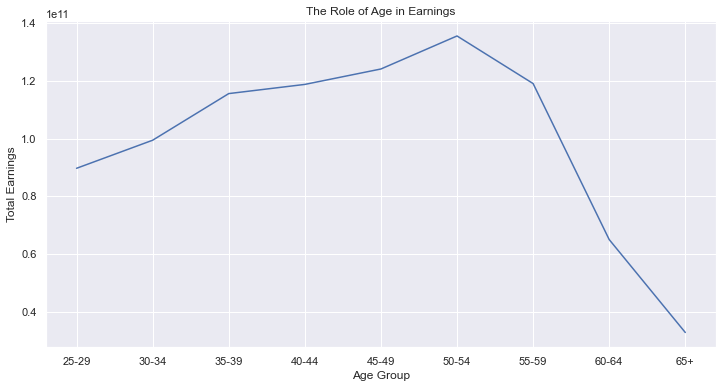

In [287]:
ax = sns.lineplot(x = "AGEGP", y = "w_earnings", data = age_earnings_df)
ax.set(xlabel='Age Group', ylabel='Total Earnings', title='The Role of Age in Earnings')
ax.set_xticks(range(7,16)) # <--- set the ticks first
ax.set_xticklabels(['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+'])
fig = ax.get_figure()
fig.savefig("age_earnings.png")

In [288]:
# Inequality across cohorts (Gini)

In [295]:
age_gini_df = df.groupby('AGEGP').apply(lambda x : gini(x['EARNINGS'], x['FWEIGHT']))

AGEGP
4     0.634067
5     0.582741
6     0.512548
7     0.476317
8     0.480404
9     0.496312
10    0.512358
11    0.519398
12    0.519467
13    0.588374
14    0.714132
15    0.873273
16    1.017859
dtype: float64

In [296]:
age_gini_df = age_gini_df.drop([4,5,6])
age_gini_df

AGEGP
7     0.476317
8     0.480404
9     0.496312
10    0.512358
11    0.519398
12    0.519467
13    0.588374
14    0.714132
15    0.873273
16    1.017859
dtype: float64

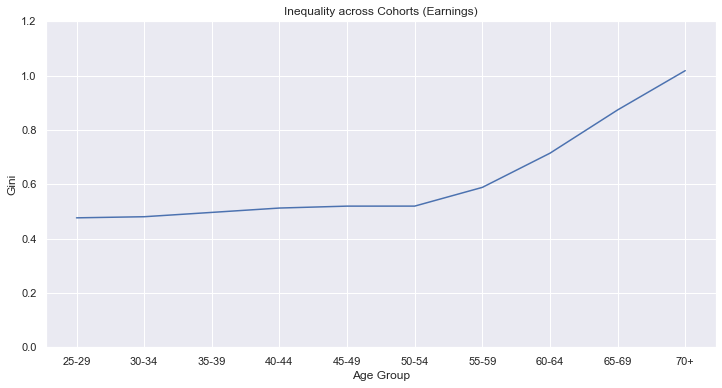

In [299]:
ax = sns.lineplot(data = age_gini_df)
ax.set(xlabel='Age Group', ylabel='Gini', title='Inequality across Cohorts (Earnings)')
ax.set_ylim([0,1.2])
ax.set_xticks(range(7,17)) # <--- set the ticks first
ax.set_xticklabels(['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70+'])
fig = ax.get_figure()
fig.savefig("age_gini.png")

In [300]:
# Compute the average income, earnings, and age for each earning quantile

In [308]:
bin_quantiles = [0,.01,.4,.6,.8,.9,.95,.99,1] # We skip the bottom quintiles because they are all 0
df['EARNINGS_BINNED'] = pd.cut(df['EARNINGS'], w_earnings.quantile(bin_labels).unique(), labels=bin_labels[1:])

In [332]:
def weighted_average_stats(group):
    w_group_income = DescrStatsW(group['MTINC'], weights=group['FWEIGHT'])
    w_group_earnings = DescrStatsW(group['EARNINGS'], weights=group['FWEIGHT'])
    w_group_age = DescrStatsW(group['AGEGP'], weights=group['FWEIGHT'])

    d = {}
    d['average income'] = w_group_income.mean
    d['average earnings'] = w_group_earnings.mean
    age_group = round(w_group_age.mean)
    age_map = {
        9: '35-39',
        10: '40-44',
        11: '45-49',
        12: '50-54',
        13: '55-59',
    }
    d['average age'] = age_map[age_group]
    
    return pd.Series(d, index=['average income', 'average earnings', 'average age'])

In [314]:
avg = df.groupby('EARNINGS_BINNED').apply(weighted_average_stats)
avg.index.name = 'earnings quantile'
avg.round(2)

,average income,average earnings,average age
earnings quantile,,,
0.01,12354.78,-114.54,55-59
0.4,15903.79,2421.55,40-44
0.6,20459.82,15899.37,35-39
0.8,45098.71,41878.91,40-44
0.9,74566.28,71151.90,40-44
0.95,100956.47,96956.36,45-49
0.99,146890.39,138430.45,45-49
1.0,329365.44,311999.61,45-49


In [315]:
# Now the same for income quantiles

In [325]:
mtinc_bin_quantiles = [0,.01,.2,.4,.6,.8,.9,.95,.99,1] 
df['MTINC_BINNED_QUANTILES'] = pd.cut(df['MTINC'], w_mtinc.quantile(mtinc_bin_quantiles).unique(), labels=mtinc_bin_quantiles[1:])


In [333]:
avg = df.groupby('MTINC_BINNED_QUANTILES').apply(weighted_average_stats)
avg.index.name = 'income quantile'
avg.round(2)

,average income,average earnings,average age
income quantile,,,
0.01,-204.87,-147.66,45-49
0.2,1108.42,487.79,45-49
0.4,9457.15,6057.69,40-44
0.6,26750.34,19378.42,45-49
0.8,49820.85,40036.82,45-49
0.9,77829.84,67062.28,45-49
0.95,104287.68,91592.34,45-49
0.99,152426.19,125356.87,45-49
1.0,349502.78,271967.16,50-54
